# Decision Tree Regressor

Or how to split your dataset in tiny parts

https://gdcoder.com/decision-tree-regressor-explained-in-depth/ is well explained!

## Import

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [2]:
happy = pd.read_csv("./data/happiness.csv", usecols=[1,2,3])

#dependent variable
y = happy['happy']

# explaining variables
X = happy[['temp', 'fish']]

# _train related to the training set, _test to the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Learning algorithm

### First, let's see how we make the prediction

In [3]:
dtr =  DecisionTreeRegressor(max_depth = 1)
dtr.fit(X_train, y_train)
dtr.predict(X_test)

array([3.73435656, 1.45838338, 1.45838338, 3.73435656, 1.45838338,
       1.45838338, 1.45838338, 3.73435656, 1.45838338, 3.73435656,
       1.45838338, 1.45838338, 3.73435656, 1.45838338, 1.45838338,
       1.45838338, 1.45838338, 1.45838338, 3.73435656, 1.45838338,
       1.45838338, 1.45838338, 1.45838338, 1.45838338, 1.45838338,
       1.45838338, 1.45838338, 1.45838338, 3.73435656, 1.45838338,
       1.45838338, 1.45838338, 1.45838338, 3.73435656, 3.73435656,
       1.45838338, 1.45838338, 1.45838338, 1.45838338, 1.45838338,
       1.45838338, 3.73435656, 1.45838338, 3.73435656, 1.45838338,
       1.45838338, 1.45838338, 1.45838338, 3.73435656, 1.45838338,
       3.73435656, 1.45838338, 3.73435656, 3.73435656, 3.73435656,
       1.45838338, 1.45838338, 1.45838338, 3.73435656, 3.73435656,
       3.73435656, 1.45838338, 3.73435656, 1.45838338, 1.45838338,
       3.73435656, 3.73435656, 3.73435656, 1.45838338, 3.73435656,
       3.73435656, 1.45838338, 3.73435656, 3.73435656, 1.45838

[Text(418.5, 611.55, 'X[1] <= 2.906\nmse = 2.224\nsamples = 273\nvalue = 2.367'),
 Text(209.25, 203.85000000000002, 'mse = 1.054\nsamples = 164\nvalue = 1.458'),
 Text(627.75, 203.85000000000002, 'mse = 0.874\nsamples = 109\nvalue = 3.734')]

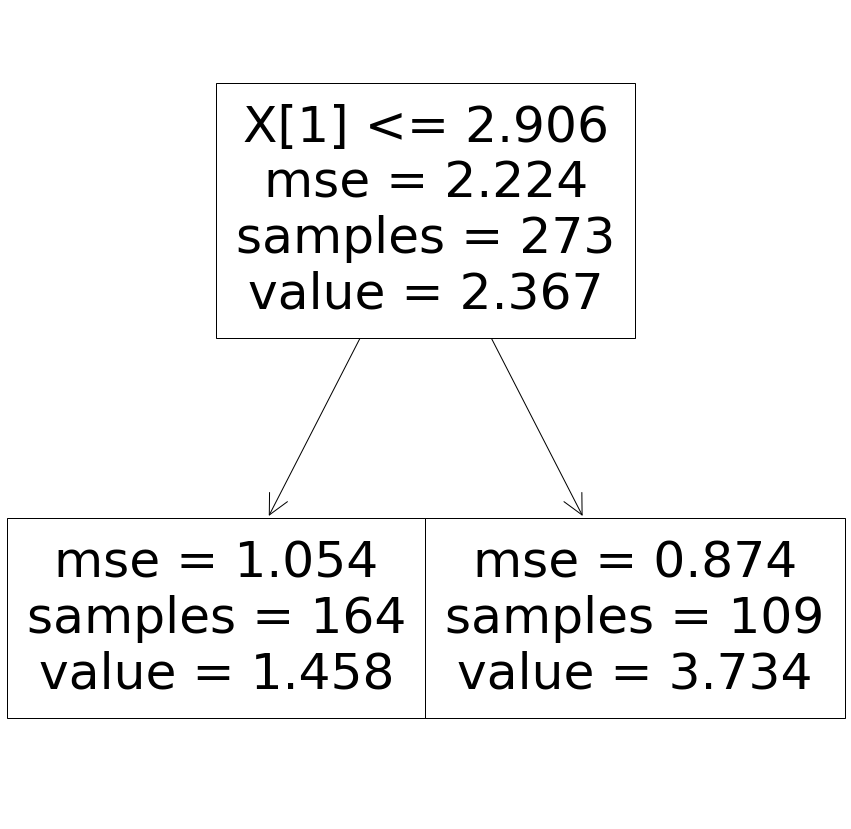

In [4]:
plt.figure(figsize=(15,15))
plot_tree(dtr)

## Explanation

That's why we call it a tree!

Each rectangle is a node (or a leaf at the bottom), and arrows are branches.

At each step, we cut the dataset in multiple parts, based on a 'purity' criteria (see shannon entropy or gini impurity); we want to consitute parts of the dataset having the 'same' values. If the notion of impurity is too abstract, just think of it as some sort of variance between two sets.

To do that, we use the explaining variable, here X[0] is the temperature, and X[1] the fish consumption.

In the first example, you isolate the part of your dataset having X[1] (i.e fish consumption) values lower than 1.982 in a set of 127 elements having an impurity of 1.218, and values strictly greater than 1.982 in another set.


At the end, we predict a value for each set.

Mean Squared Error : 1.2944740010074354


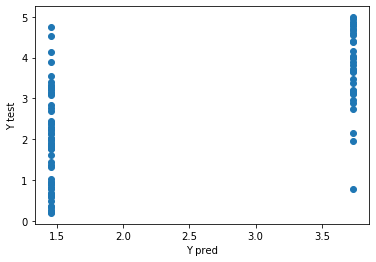

In [5]:
#our predictions
y_pred = dtr.predict(X_test)

print("Mean Squared Error : "+str(np.mean((y_pred-y_test)**2)))

plt.scatter(y_pred, y_test)
plt.ylabel("Y test")
plt.xlabel("Y pred")
plt.show()

### Ok, but the results are bad, right?

Yep, because the results depends on learning parameters, that we want to optimize!

In [6]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

Where:
- ccp_alpha is the cost complexity of pruning, i.e. an indicator of complexity of each node; the higher it is, the more we want to cut the set correponding to this node
- criterion is the metric we want to minimize. At each step, it computes the metrics for each set. The more it cuts the dataset, the more the metric is supposed to drop :)
- max depth is the maximum depth of the tree. Here it's an example tree of depth 1, but with higher complexities of dataset and higher accuracies, we want to increase the depth. Be careful, if you increase the depth too much, you will overfit on your data (i.e., you won't be able to generalize over a new dataset, because you learnt all the specificities of your training set!)
- max features is the maximal number of features you will consider to split your dataset. could be useful if you have multiple features and you don't want to use all. It's a way to avoid overfitting too.
- max_leaf_node is explicit, it's the maximal number of nodes you can have in your tree
- min_impurity_decrease is a way to stop splitting your dataset when the decrease of impurity is too low. That's the stop threshold.
- min_impurity_split is deprecated, previous name of min_impurity_decrease (I think)
- min_sample_leaf is the minimal number of element (ie lines) of your dataset you should have in a set. Another tool to stop the tree growth and avoid overfit.
- min_sample_split is the minimal number of element (ie lines) of your dataset you should have in a set to be able to split it. Another tool to stop the tree growth and avoid overfit, again! ;)
- min_weight_fraction_leaf if you weight your sample, you should have at least a proportion of the total sum of weights in a node. That's what we are talking about, this proportion.
- presort deprecated, don't care
- random state is useless in real life, and even dangereous; don't put it!!! It fixes the random seed of the pseudo-random algorithm, and you will keep the same results between two launches. Only for academic purposes!
- splitter could be set to random if you want to add some variability. It will split randomly the node, best will choose the lowest impure split.

Max depth and min sample leaf are important, but as long as you validate your model, you should be able to detect if you're overfitting on your data (if the metric of training << metric of test).

Of course, these explanations do not replace the doc:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Set these (hyper)parameters are a part of your job as a ML engineer :p

Now a better prediction to end up with decision trees

Mean Squared Error : 0.8746463504718455


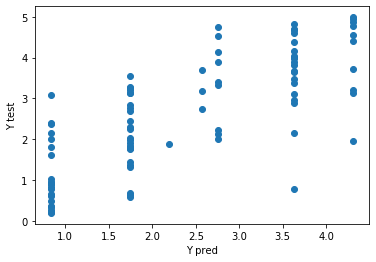

In [7]:
dtr =  DecisionTreeRegressor(max_depth = 3)
dtr.fit(X_train, y_train)
dtr.predict(X_test)

#our predictions
y_pred = dtr.predict(X_test)

print("Mean Squared Error : "+str(np.mean((y_pred-y_test)**2)))

plt.scatter(y_pred, y_test)
plt.ylabel("Y test")
plt.xlabel("Y pred")
plt.show()

# Decision Trees can be used for classification!

About pruning

https://www.displayr.com/machine-learning-pruning-decision-trees/